In [2]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from tabulate import tabulate

In [10]:
def plotting_function(xs, ys, xlabel, ylabel, title, pcov, popt, plot_shape='bo', round_to=4):
    text = "If the Equation is y = mx + c\nFor the best fit curve:\n"
    text += f"    m = {format(popt[0], '.4g')} ± {round((pcov[0][0])**0.5, round_to+2)}\n"
    text += f"    c = {format(popt[1], '.4g')} ± {round((pcov[1][1])**0.5, round_to+2)}\n"
    print(text)
    print("The curve looks like:")
    span = max(xs) - min(xs)
    a = 0.05 # amount of free space to be shown before the least point and after the maximum
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.plot(xs, ys, plot_shape) 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), 'r')

    # error lines 
    # plt.plot(xFit, func(xFit, popt[0]+((pcov[0][0])**0.5), popt[1]+((pcov[1][1])**0.5)), "b--") # "b--" means blue dashed lines                          ^                            ^
    # plt.plot(xFit, func(xFit, popt[0]-((pcov[0][0])**0.5), popt[1]-((pcov[1][1])**0.5)), "b--")

    plt.legend(["Data Points", "Least Square Fit", "Error Boundaries"])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.text(0.5, 0.15, text, fontsize=12, transform=plt.gcf().transFigure)
#     plt.title(title)

# Density of the sample

In [3]:
w1 = 21.4
w2 = 46.3
w3 = 53.6
rho = 1000*(w3-w1)/(w2-w1)
rho

1293.1726907630525

# I vs B Calibration

If the Equation is y = mx + c
For the best fit curve:
    m = 974.0548496417125 ± 2.560314
    c = 5.4453 ± 6.526493

The curve looks like:


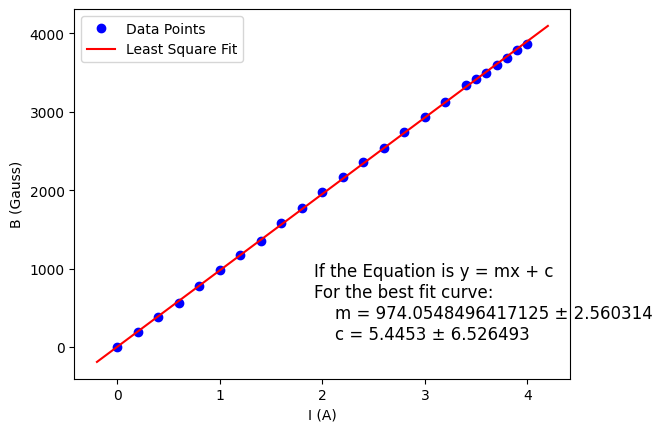

In [4]:
def straight_line(x, m, c): return m*x + c

b_cal = np.array([0, 188, 389, 568, 780, 988, 1170, 1350, 1580, 1770, 1980, 2170, 2360, 2540, 2740, 2940, 3130, 3340, 3420, 3500, 3600, 3690, 3790, 3870])
i_cal = np.array([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4])
popt, pcov = curve_fit(straight_line, i_cal, b_cal)

def get_calibrated_b(i): return popt[0]*i + popt[1]

plotting_function(i_cal, b_cal, 'I (A)', 'B (Gauss)', '', pcov, popt)

In [5]:
table_cal = np.array([i_cal, b_cal]).transpose()
print(tabulate(table_cal, tablefmt="latex"))

\begin{tabular}{rr}
\hline
 0   &    0 \\
 0.2 &  188 \\
 0.4 &  389 \\
 0.6 &  568 \\
 0.8 &  780 \\
 1   &  988 \\
 1.2 & 1170 \\
 1.4 & 1350 \\
 1.6 & 1580 \\
 1.8 & 1770 \\
 2   & 1980 \\
 2.2 & 2170 \\
 2.4 & 2360 \\
 2.6 & 2540 \\
 2.8 & 2740 \\
 3   & 2940 \\
 3.2 & 3130 \\
 3.4 & 3340 \\
 3.5 & 3420 \\
 3.6 & 3500 \\
 3.7 & 3600 \\
 3.8 & 3690 \\
 3.9 & 3790 \\
 4   & 3870 \\
\hline
\end{tabular}


# Straight line fitting h vs B^2

If the Equation is y = mx + c
For the best fit curve:
    m = 6.096e-05 ± 2e-06
    c = 6.235e-05 ± 1.3e-05

The curve looks like:


(6.095607795173019e-05,
 6.23510152284459e-05,
 array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 array([0.49247274, 0.97950016, 1.46652759, 1.95355501, 2.44058244,
        2.92760986, 3.41463729, 3.90166471]))

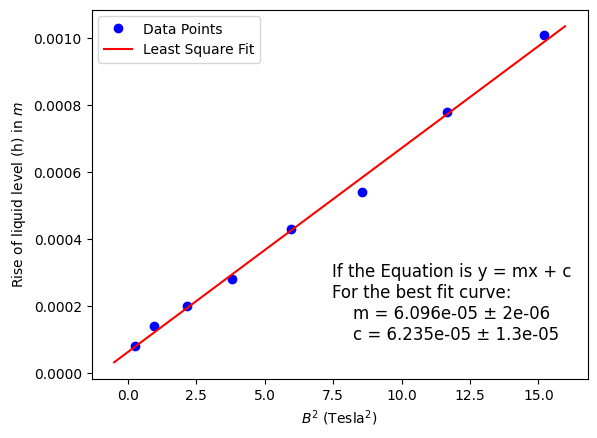

In [13]:
i = np.arange(0.5, 4.5, 0.5)
b = get_calibrated_b(i)*10e-4 # in teslas
b2 = np.power(b, 2)

height_0 = 7.896
heights = np.array([7.904, 7.910, 7.916, 7.924, 7.939, 7.950, 7.974, 7.997])
h = (heights - height_0)/100  # difference in metres

popt1, pcov1 = curve_fit(straight_line, b2, h)

plotting_function(b2, h, '$B^2$ (Tesla$^2$)', 'Rise of liquid level (h) in $m$', '', pcov1, popt1)
popt1[0], popt1[1], i, b

In [22]:
table = np.array([i, np.round(b, 4), np.round(b2, 4), heights, h*100]).transpose()
print(tabulate(table, tablefmt='latex'))

\begin{tabular}{rrrrr}
\hline
 0.5 & 0.4925 &  0.2425 & 7.904 & 0.008 \\
 1   & 0.9795 &  0.9594 & 7.91  & 0.014 \\
 1.5 & 1.4665 &  2.1507 & 7.916 & 0.02  \\
 2   & 1.9536 &  3.8164 & 7.924 & 0.028 \\
 2.5 & 2.4406 &  5.9564 & 7.939 & 0.043 \\
 3   & 2.9276 &  8.5709 & 7.95  & 0.054 \\
 3.5 & 3.4146 & 11.6597 & 7.974 & 0.078 \\
 4   & 3.9017 & 15.223  & 7.997 & 0.101 \\
\hline
\end{tabular}


# Calculations

In [15]:
chi0 = popt1[0]*4*9.81*4*np.pi*10e-7*(rho-1.29)
chi = chi0-(-9.04e-6)
mass_chi = chi/rho
molar_chi = mass_chi*169/1000

chi0, chi, mass_chi, molar_chi

(3.8831034243146806e-05,
 4.787103424314681e-05,
 3.7018284243924074e-08,
 6.256090037223168e-09)

In [16]:
curie = molar_chi*(273.15+30)
moment = 2.8241*np.sqrt(curie)

curie, moment

(1.8965336947842032e-06, 0.0038892006736978096)

# Error Analysis

In [21]:
d_chi = chi*np.sqrt((pcov[0][0]/popt[0])**2+(6.7/(rho-1.29)**2))
d_chi1 = mass_chi*np.sqrt((d_chi/chi)**2+(6.7/rho)**2)
d_chi2 = molar_chi*(d_chi1/mass_chi)
d_curie = curie*np.sqrt((d_chi2/molar_chi)**2+(0.1/299)**2)
d_moment = moment*(d_curie/(2*curie))

d_chi, d_chi1, d_chi2, d_curie, d_moment

(3.361381138762966e-07,
 3.230324576016802e-10,
 5.459248533468395e-11,
 1.656186256258393e-08,
 1.698161419784875e-05)